In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Configure for presentation
np.set_printoptions(threshold=50, linewidth=50)
import matplotlib as mpl
mpl.rc('font', size=16)

Table.static_plots()


## The GSI's Defense

In [2]:
# The data
scores = Table.read_table('scores_by_section.csv')
scores

Section,Midterm
1,22
2,12
2,23
2,14
1,20
3,25
4,19
1,24
5,8
6,14


In [4]:
def identity(x):
    return x

In [10]:
## Q1: Create a 2-column table that shows the average midterm score for each section.
scores_by_section = scores.group("Section", np.average)
scores_by_section

## Q2: Create a bar chart comparing the average midterm score across each section, sorted from highest to lowest. 
#scores_by_section.sort("Midterm average", descending = True).barh("Section")

Section,Midterm average
1,15.5938
2,15.125
3,13.6667
4,14.7667
5,17.4545
6,15.0312
7,16.625
8,16.3103
9,14.5667
10,15.2353


# Question 3:

Did section 3 actually do worse than every other section in the class?

H0 (Null hypothesis): Group 3 did not actually do worse, and the difference we observed was due to random chance.

Ha (Alternative hypothesis): Group 3 did worse than all the other sections, and the difference was due to something other than random chance (e.g. GSI was worse, section time was worse, something different about students)


Test statistic: Average of midterm scores for section 3


In [9]:
## Finish this function to calculate the test statistic.

def test_statistic(section_tbl):
    return np.average(section_tbl.column("Midterm"))

## This is the observed data for section 3 
section_3_mean = test_statistic(scores.where("Section", are.equal_to(3)))
section_3_mean

13.666666666666666

In [29]:
## Goal: remove any association between section and midterm score
# This way is complicated, but it preserves differences in section size
random_sections = scores.sample(scores.num_rows, with_replacement = False).column("Section")
new_sample = scores.with_column("Section", random_sections)
np.average(new_sample.where("Section", 3).column("Midterm"))

16.59259259259259

In [31]:
## Let's practice simulating once and calculating the statistic under the null hypothesis.
# This method is simpler and works for our purposes
one_sample = scores.sample(27, with_replacement = False)
one_sample_statistic = test_statistic(one_sample)
one_sample_statistic

16.37037037037037

In [37]:
## Great! Now generalize that code to write a function to simulate the statistic under the null. 

def simulate_statistic_under_null(section_size):
    random_section = scores.sample(section_size, with_replacement = False)
    return test_statistic(random_section)

simulate_statistic_under_null(10)

15.0

In [38]:
## Finally, we will do what we've been doing: 
# Perform many simulations, calculate their statistics, and save those values in an array.

results = make_array()
num_trials = 1000
sample_size = 27

for i in np.arange(num_trials):
    sim_test_stat = simulate_statistic_under_null(sample_size)
    results = np.append(results, sim_test_stat)

results

array([14.48148148, 14.88888889, 14.96296296,
       ..., 16.11111111, 16.18518519,
       17.        ])

In [39]:
## This function will create a histogram of your test statistics with the observed statistic.

def draw_test_statistic(obs_stat, simulation_results):
    sim_table = Table().with_column("Sample average score", simulation_results)
    sim_table.hist("Sample average score", bins=30)
    plots.axvline(obs_stat, color="red")


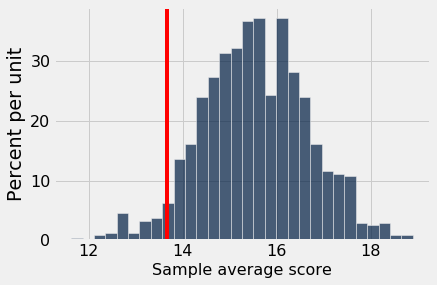

In [40]:
draw_test_statistic(section_3_mean, results)

In [ ]:
## If this observed result is unlikely, we should reject the null
## If this observed result is likely, we should not reject the null
# Jason: Reject
# Jenna: Fail to reject
# In general: it depends based on the likelihood of receiving the observed result or something more extreme
# under the null hypothesis - look into more stats classes if you're interested!